In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

: 

In [177]:
class PCA:
    def __init__(self, no_prin_comps):
        self.no_prin_comps = no_prin_comps
        self.mean = None
        self.princ_comp = None
    def fit(self, X):
        #mean centered dataset
        self.mean = np.mean(X, axis = 0)
        print(f'Mean: {self.mean}')
        
        X = X - self.mean
        
        #scatter matrix
        S = (len(X) - 1) * np.cov(X.T)
        
        #eigen val and eigen vec
        eigen_values, eigen_vectors = np.linalg.eig(S)
        eigen_vectors = eigen_vectors.T
        idx = np.argsort(eigen_values)[::-1]
        
        eigen_values, eigen_vectors = eigen_values[idx], eigen_vectors[idx]
        
        self.princ_comp = eigen_vectors[:self.no_prin_comps]
        print(f'Eigen values: {eigen_values}')
        print(f'Principal components: {self.princ_comp}')
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.princ_comp.T)

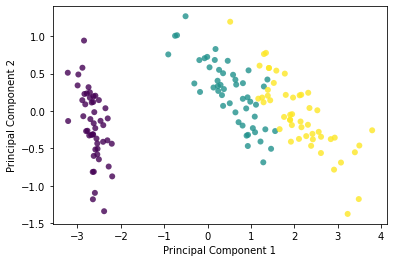

In [48]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

import time

In [160]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [161]:
start_time = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
duration = time.time() - start_time

print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.061836957931518555
Confusion matrix: 
[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy:  0.9666666666666667


In [179]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)
print(X_projected.shape)
print(X_projected)

Mean: [5.84333333 3.05733333 3.758      1.19933333]
Eigen values: [630.0080142   36.15794144  11.65321551   3.55142885]
Principal components: [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
(150, 2)
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2)

In [181]:
start_time = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
duration = time.time() - start_time

print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.025948762893676758
Confusion matrix: 
[[14  0  0]
 [ 0  2  8]
 [ 0  0  6]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.20      0.33        10
           2       0.43      1.00      0.60         6

    accuracy                           0.73        30
   macro avg       0.81      0.73      0.64        30
weighted avg       0.89      0.73      0.70        30

Accuracy:  0.7333333333333333


In [189]:
start_time = time.time()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_projected)
duration = time.time() - start_time
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [190]:
preds = kmeans.predict(X_test)

In [191]:
print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.020952701568603516
Confusion matrix: 
[[14  0  0]
 [ 0 10  0]
 [ 0  3  3]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.77      1.00      0.87        10
           2       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.92      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30

Accuracy:  0.9


In [192]:
X_projected

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,